In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

In [2]:
# Load data from the file ../data/birthdays.dat
file_path = '../data/birthdays.dat'
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['date', 'count'], dtype={'date': str})

# Add columns for month and day
df['month'] = df['date'].str[:2].astype(int)
df['day'] = df['date'].str[2:].astype(int)

# Filter the DataFrame to remove February 29
df = df[~((df['month'] == 2) & (df['day'] == 29))]

# Create the datetime column (for x-axis) and handle potential invalid values
df['datetime'] = pd.to_datetime(df['date'], format='%m%d', errors='coerce')

# Add a column for day of the year
df['d'] = df.index.values + 1

# Add error column (square root of count)
df['err'] = np.sqrt(df['count'])

/var/folders/1l/c_2331zd5jv7lkysw38mn7f00000gn/T/ipykernel_9168/1719249300.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['date', 'count'], dtype={'date': str})


In [5]:
# Total number of days considered
num_days = len(df)

# Total number of births
total_births = df['count'].sum()

# Expected number of births per day (if uniformly distributed)
expected_births_per_day = total_births / num_days

# Add a column for the expected number of births per day
df['expected'] = expected_births_per_day

In [6]:
df

,date,count,month,day,datetime,d,err,expected
0,0101,1482,1,1,1900-01-01,1,38.496753,1317.027397
1,0102,1213,1,2,1900-01-02,2,34.828150,1317.027397
2,0103,1220,1,3,1900-01-03,3,34.928498,1317.027397
3,0104,1319,1,4,1900-01-04,4,36.318040,1317.027397
4,0105,1262,1,5,1900-01-05,5,35.524639,1317.027397
...,...,...,...,...,...,...,...,...
361,1227,1256,12,27,1900-12-27,362,35.440090,1317.027397
362,1228,1426,12,28,1900-12-28,363,37.762415,1317.027397
363,1229,1332,12,29,1900-12-29,364,36.496575,1317.027397
364,1230,1355,12,30,1900-12-30,365,36.810325,1317.027397


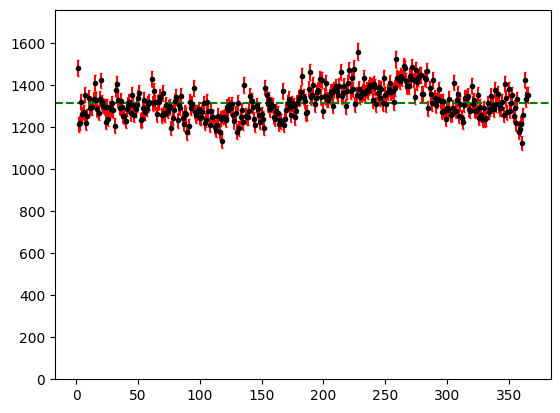

In [7]:
# Plot the birth count with error bars
plt.errorbar(df['d'], df['count'], yerr=df['err'], color='black', fmt='.', ecolor='r', capsize=1, label='Count with error')

# Set y-axis limit slightly above the maximum count value for better visibility
plt.ylim(0, df['count'].max() + 200)

# Add a horizontal line representing the expected average number of births per day
plt.axhline(y=expected_births_per_day, color='green', linestyle='--', label='Expected Average')

In [8]:
# Calculate the chi-square statistic
def chi_square(observed, expected):
    return np.sum((observed - expected)**2 / expected)

In [9]:
chi_square_val = chi_square(df['count'], df['expected'])

In [10]:
chi_square_val

1352.7233599950073

In [12]:
# Number of categories (or groups)
k = len(df['count'])  # or manually input the number of categories

# Degrees of freedom
degrees_of_freedom = k - 1

# Calculate the p-value
p_value = stats.chi2.sf(chi_square_val, degrees_of_freedom)

print(f"P-value: {p_value}")

P-value: 1.2489373800065768e-113


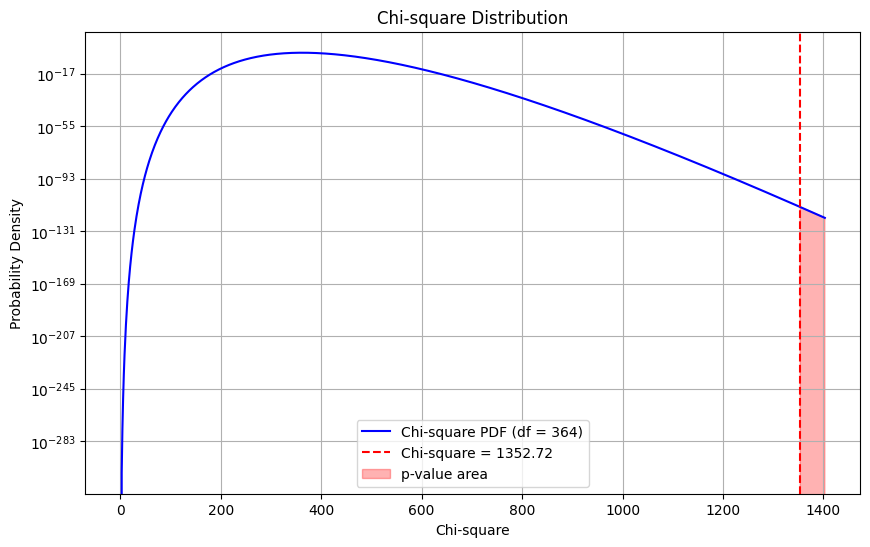

In [15]:
# Number of categories (replace with the correct value)
k = 365
degrees_of_freedom = k - 1

# Generate the chi-square distribution
x = np.linspace(0, chi_square_val + 50, 1000)
pdf = stats.chi2.pdf(x, degrees_of_freedom)

# Plot the chi-square distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f"Chi-square PDF (df = {degrees_of_freedom})", color='blue')
plt.axvline(chi_square_val, color='red', linestyle='--', label=f"Chi-square = {chi_square_val:.2f}")

# Fill the area under the curve where x >= chi_square_val, representing the p-value
plt.fill_between(x, pdf, where=(x >= chi_square_val), color='red', alpha=0.3, label='p-value area')

# Set plot titles and labels
plt.title("Chi-square Distribution")
plt.xlabel("Chi-square")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

# Set y-axis to logarithmic scale for better visibility of low probabilities
plt.yscale('log')

# Display the plot
plt.show()
